In [1]:
"""
Inspired from the "Introduction to Statistical Learning" of James et al.

Work here deals with Linear (simple and multiple) regression,
of the Sales dataset (Sales ~ Newspaper adv, Radio adv, TV adv)
and how such analysis can help us in a marketing plan. 

The business relevant question :
Which media contribute to Sales ?
"""

'\nInspired from the "Introduction to Statistical Learning" of James et al.\n\nWork here deals with Linear (simple and multiple) regression,\nof the Sales dataset (Sales ~ Newspaper adv, Radio adv, TV adv)\nand how such analysis can help us in a marketing plan. \n\nThe business relevant question :\nWhich media contribute to Sales ?\n'

In [3]:
# necessary imports
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../lib_plot")
import scatter_boxplot as sbp
%matplotlib inline
import seaborn as sns
from scipy.stats.stats import pearsonr
from scipy import stats

/Users/charilaostsarouchas/anaconda/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /Users/charilaostsarouchas/anaconda/lib/python2.7/argparse.pyc, but /Users/charilaostsarouchas/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


In [4]:
# — the dataset is provided by James et al., Introduction to Statistical Learning.
# here: http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# The business question:
# Which media contribute to Sales ?

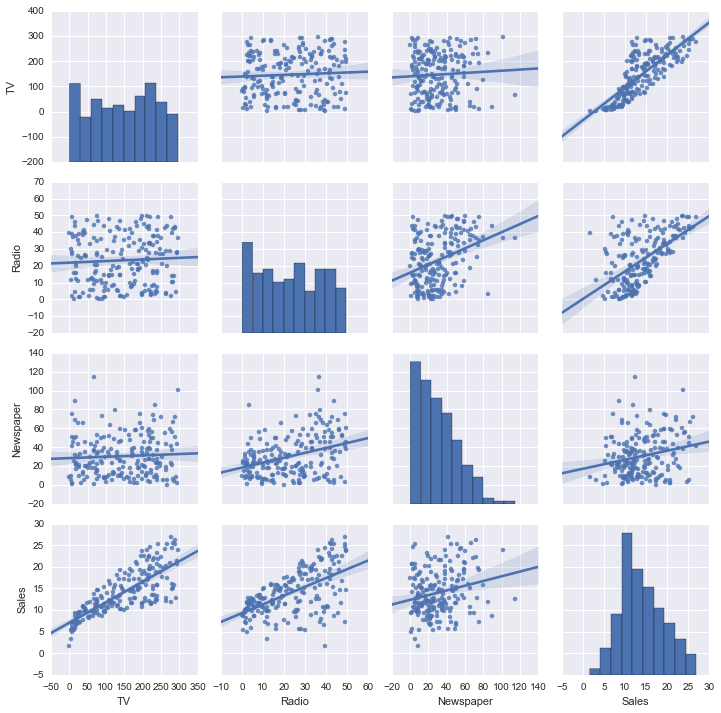

In [5]:
# lets see the linear relation separately 
sns.pairplot(df, size=2.5, kind='reg');

In [6]:
# Just visually we see that with sales there seems to be some correlation with TV,  some correlation with Radio and 
# maybe some but weaker corellation with Newspaper.
# We see also that there are other weak correlations e.g. Radio with Newspaper, we keep this for later.

In [7]:
# Lets now get some numbers of these correlations
print "Sales ~ TV", pearsonr(df['Sales'], df['TV'])
print "Sales ~ Radio", pearsonr(df['Sales'], df['Radio'])
print "Sales ~ Newspaper", pearsonr(df['Sales'], df['Newspaper'])



Sales ~ TV (0.78222442486160637, 1.4673897001947305e-42)
Sales ~ Radio (0.57622257457105519, 4.3549660017668541e-19)
Sales ~ Newspaper (0.22829902637616534, 0.001148195868888206)


In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Sales'], df['TV'])
print slope, intercept, r_value*r_value, p_value, std_err

12.8716511154 -33.4502277651 0.61187505085 1.46738970019e-42 0.728544480517


In [9]:
# =>
# A first simple approach is to check the p-value of each media, they have to be 'low' so to contribute.

# Our visual inspection is confirmed here:
# Stronger correlation happens with TV then Radio and finally Newspaper, see pearson correlation and relative p-vals.

# Remember
# p-value:
# it is the probability to observe any value >= our calculated t-statistic (= number of st. deviations our b1 
# of y=biX+b0+e, is away from 0, assuming b1=0)
# as probability is a value in [0, 1]
# if ~0 => our Null hypothesis wrong => There is relationship between media sales
# if ~1 => our Null hypothesis correct => No relationship between media sales

# low:
# long story, but typically 0.05 indicates string evidence against the null hypothesis

# !!! Attention
# A significance level of 0.05 does indicate that 5% of studies will reject the null hypothesis while the null hypothesis is indeed true. 
# BUT we can not interpret the p-val in the same way.

### TV correlation

In [11]:
import statsmodels.formula.api as sm
model = sm.ols(formula='Sales ~ TV', data=df)
res = model.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 03 Sep 2015   Prob (F-statistic):           1.47e-42
Time:                        23:03:32   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.0

### Radio correlation

In [12]:
model = sm.ols(formula='Sales ~ Radio', data=df)
res = model.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 03 Sep 2015   Prob (F-statistic):           4.35e-19
Time:                        23:03:33   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000         8.202    10.422
Radio          0.2025      0.020      9.921      0.0

### Newspaper correlation

In [13]:
model = sm.ols(formula='Sales ~ Newspaper', data=df)
res = model.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 03 Sep 2015   Prob (F-statistic):            0.00115
Time:                        23:03:34   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000        11.126    13.577
Newspaper      0.0547      0.017      3.300      0.0

### All media correlation

In [14]:
model = sm.ols(formula='Sales ~ TV + Radio + Newspaper', data=df)
res = model.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 03 Sep 2015   Prob (F-statistic):           1.58e-96
Time:                        23:03:35   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.0

### Remarks until here

In [15]:
# Comparing the multiple regression coefficient with the individual ones we get:
#           | Mulitple , Single
# TV        : 0.0458, 0.0475
# Radio     : 0.1885, 0.2025 
# Newspaper : 0.0547, -0.0010
# => The multiple and simple regression coefficients can be quite different.
# => The relationship revealed in multiple regression is the one to be trusted, this because:
#    the true correlation comes from Sales ~ Radio, 
#    but there is also a correlation Radio ~ Newspaper
#    In this way the newspaper 'looks like' it is correlated with Sales, Sales ~ Newspaper, if not multiple reg. context.
#    This phenomenon, correlation of features, is called collinearity 

### Necessary checks

In [16]:
# Before we continue with selection of features,
# it makes sense to see _if_ there is a relationship between Response and predictors.

# if any of the p-values of the features of the multipel reg. is very small isn't it garanteed that we have this relationship?
# do we need to check some other metric?

# Actually checking the coef. / p-vals of multiple regression is not enough!
# This happens especially when the num of predictors is large. 
# There is a very high probability that we ll observer at least one p-val <0.05 just by chance.

# => Thats why we need to use the F-statistic, which corrects for the number of predictors.
# The rule is that F-stat >> 1 is good indication, 
# even more correct, if n large F-stat >~1 can be also good OR F-stat >> 1 if n small.
# Nevertheless, since F-stat followes an F distribution there are calculations that can give us the corresponding 
# p-val which we can use and judge to reject or not the null hypothesis.

# => Here Prob (F-statistic):           1.58e-96 ~0 => THERE IS A RELATIONSHIP !

# !!! Attention if p >~ n then F-stat can not be used !!!

### Feature selection

In [43]:
df_features = df[['TV','Radio', 'Newspaper']]
df_target = df['Sales']
X = df_features
y = df_target

In [ ]:
"""
Feature importance evaluation
The relative rank (i.e. depth) of a feature used as a decision node in a tree can be used to assess 
the relative importance of that feature with respect to the predictability of the target variable. 
Features used at the top of the tree are used contribute to the final prediction decision of a larger fraction 
of the input samples. The expected fraction of the samples they contribute to can thus be used as an estimate 
of the relative importance of the features.
By averaging those expected activity rates over several randomized trees one can reduce the variance of such an 
estimate and use it for feature selection.
"""

In [ ]:
"""
from here:http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

There are indeed several ways to get feature "importances". As often, there is no strict consensus about what this word means.
In scikit-learn, we implement the importance as described in [1] (often cited, but unfortunately rarely read...).
It is sometimes called "gini importance" or "mean decrease impurity" and is defined as the total decrease in node
impurity (weighted by the probability of reaching that node (which is approximated by the proportion of samples 
reaching that node)) averaged over all trees of the ensemble.

In the literature or in some other packages, you can also find feature importances implemented as the 
"mean decrease accuracy". Basically, the idea is to measure the decrease in accuracy on OOB data when you 
randomly permute the values for that feature. If the decrease is low, then the feature is not important, 
and vice-versa.

(Note that both algorithms are available in the randomForest R package.)
[1]: Breiman, Friedman, "Classification and regression trees", 1984.

"""

Features sorted by their score:
[(0.6578, 'TV'), (0.3331, 'Radio'), (0.0091, 'Newspaper')]


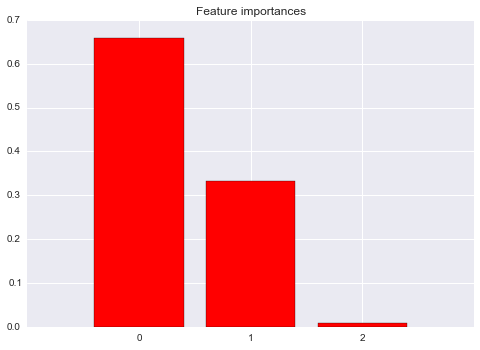

In [38]:
# Feature selection with Linear regression
names = df_features.columns
lm = linear_model.LinearRegression()
lm.fit(X, y)
feature_importances = rf.feature_importances_
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4),feature_importances), names), reverse=True)

# Plot the feature importances of the forest
indices = np.argsort(feature_importances)[::-1]
nfeatures = len(feature_importances)
plt.figure()
plt.title("Feature importances")
plt.bar(range(nfeatures), feature_importances[indices], color="r", align="center")
plt.xticks(range(nfeatures), indices)
plt.xlim([-1, nfeatures])
plt.show()


Features sorted by their score:
[(0.6316, 'TV'), (0.3575, 'Radio'), (0.0108, 'Newspaper')]


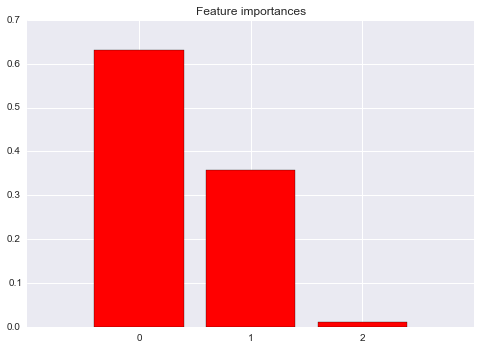

In [18]:
# Feature selection with Tree based method - Random Forest
from sklearn.ensemble import RandomForestRegressor
names = df_features.columns
rf = RandomForestRegressor()
rf.fit(X, y)
feature_importances = rf.feature_importances_
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4),feature_importances), names), reverse=True)

# Remark
#feature_importances_ : the higher, the more important the feature, Sum(feature_importances_) = 1.0

# !!! Attention, random forest feature selection cons:
# With correlated features, strong features can end up with low scores and the method can be biased towards 
# variables with many categories. As long as the gotchas are kept in mind, there really is no reason not to try them out on your data.


In [35]:
from sklearn import cross_validation
from sklearn import  linear_model
estimator = linear_model.LinearRegression()

y = df['Sales']
X_mod1 = df[['TV','Radio', 'Newspaper']]
X_mod2 = df[['TV','Radio']]
X_mod3 = df[['TV','Newspaper']]
X_mod4 = df[['TV']]
X_mod5 = df[['Radio']]
X_mod6 = df[['Newspaper']]

scores = cross_validation.cross_val_score(estimator, X_mod1, y, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_validation.cross_val_score(estimator, X_mod2, y, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_validation.cross_val_score(estimator, X_mod3, y, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_validation.cross_val_score(estimator, X_mod4, y, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_validation.cross_val_score(estimator, X_mod5, y, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_validation.cross_val_score(estimator, X_mod6, y, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# => We see that tv and radio bring R2 at 0.89 but newspaper does not really helps.

Accuracy: 0.89 (+/- 0.11)
Accuracy: 0.89 (+/- 0.10)
Accuracy: 0.61 (+/- 0.33)
Accuracy: 0.57 (+/- 0.33)
Accuracy: 0.30 (+/- 0.44)
Accuracy: 0.01 (+/- 0.21)


In [49]:
#sklearn doesn't seem to have a forward selection algorithm. 
#However, it does provide recursive feature elimination, which is a greedy feature elimination algorithm 
#similar to sequential backward selection. See the documentation here:
#http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn import  linear_model

# choose one estimator, e.g.
#estimator = SVR(kernel="linear")
estimator = linear_model.LinearRegression()

# !!! We say that we want to keep 2 values, if None half of the initial will be used
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(X, y)
print X.columns.values
print selector.support_ 
print selector.ranking_


['TV' 'Radio' 'Newspaper']
[ True  True False]
[1 1 2]


### Issues:

In [ ]:
# read here:
# http://stats.stackexchange.com/questions/20836/algorithms-for-automatic-model-selection